## Analyzing the extracted Spotify Tracks (best songs 2023 playlist)

### 1) Importing necessary libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

### 2) Read Extracted CSV file

In [ ]:
df = pd.read_csv('datasets/extracted_track_data.csv')
df.head()

,track_name,artist_name,album_name,popularity
0,Rewrite The Stars,James Arthur,The Greatest Showman: Reimagined (Deluxe),72
1,"How Far I'll Go - From ""Moana""",Alessia Cara,"How Far I'll Go (From ""Moana"")",59
2,Heavy,Anne-Marie,Speak Your Mind (Deluxe),44
3,Scars To Your Beautiful,Alessia Cara,Know-It-All (Deluxe),70
4,like my father,Jax,like my father,61


### 3) Data Preparing
#### Checking DataType and Null Values in the Dataframe

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   track_name   100 non-null    object
 1   artist_name  100 non-null    object
 2   album_name   100 non-null    object
 3   popularity   100 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


track_name     0
artist_name    0
album_name     0
popularity     0
dtype: int64

#### Creating 'highly_popular' column from existing 'popularity' column

In [12]:
df['highly_popular'] = (df['popularity'] > 80)

### 4) Analyzing the Dataframe
#### Finding avarage value of 'popularity' column

In [13]:
avg_popularity = df['popularity'].mean()
print(avg_popularity)

63.93


#### Finding the most popular track in the playlist

In [9]:
most_popular_track = df['popularity'].idxmax()
print(df.iloc[most_popular_track])

track_name        I Wanna Be Yours
artist_name         Arctic Monkeys
album_name                      AM
popularity                      91
highly_popular                True
Name: 67, dtype: object


#### Top 10 most popular artists in the playlist

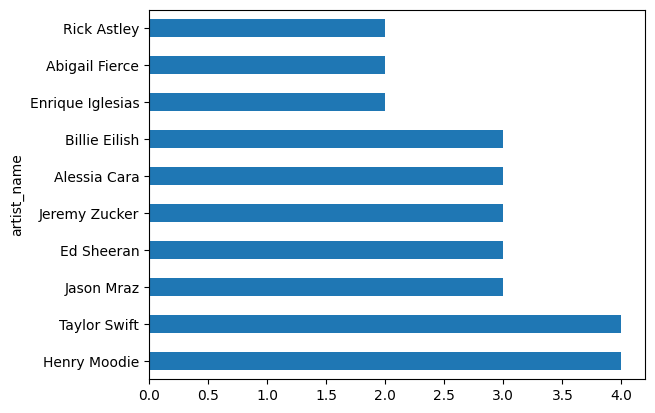

In [21]:
df['artist_name'].value_counts().head(10).plot(kind='barh');

### 5) Extract cleaned data into CSV

In [ ]:
df.to_csv("datasets/cleaned_data.csv", index=False)

### 6) Extraction into SQL database

In [28]:
df.head()

,track_name,artist_name,album_name,popularity,highly_popular
0,Rewrite The Stars,James Arthur,The Greatest Showman: Reimagined (Deluxe),72,False
1,"How Far I'll Go - From ""Moana""",Alessia Cara,"How Far I'll Go (From ""Moana"")",59,False
2,Heavy,Anne-Marie,Speak Your Mind (Deluxe),44,False
3,Scars To Your Beautiful,Alessia Cara,Know-It-All (Deluxe),70,False
4,like my father,Jax,like my father,61,False


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   track_name      100 non-null    object
 1   artist_name     100 non-null    object
 2   album_name      100 non-null    object
 3   popularity      100 non-null    int64 
 4   highly_popular  100 non-null    bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 3.3+ KB


#### Createing the database table

In [30]:
conn = sqlite3.connect('spotify_playlist_track.db')
cursor = conn.cursor()
cursor.execute('''
    CREATE TABLE IF NOT EXISTS spotify_playlist (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            track_name TEXT,
            album_name TEXT,
            populartiy INTEGER,
            highly_popular BOOLEAN
        )
''')

#### Adding data from Dataframe into Database table

In [ ]:
df.to_sql('spotify_playlist', conn, if_exists='replace', index=False)

100

#### Reading data from the Database

In [34]:
pd.read_sql('SELECT * FROM spotify_playlist', conn).head()

,track_name,artist_name,album_name,popularity,highly_popular
0,Rewrite The Stars,James Arthur,The Greatest Showman: Reimagined (Deluxe),72,0
1,"How Far I'll Go - From ""Moana""",Alessia Cara,"How Far I'll Go (From ""Moana"")",59,0
2,Heavy,Anne-Marie,Speak Your Mind (Deluxe),44,0
3,Scars To Your Beautiful,Alessia Cara,Know-It-All (Deluxe),70,0
4,like my father,Jax,like my father,61,0
